# Exploring sailplane performance in Python with glidepy

The glider polar describes the relationship between speed and sink rate. Usually it is included in the glider's flight manual in the form of a rather crude graph. For example, this is the polar provided for the ASW27. Both unballasted and ballasted curves are shown.

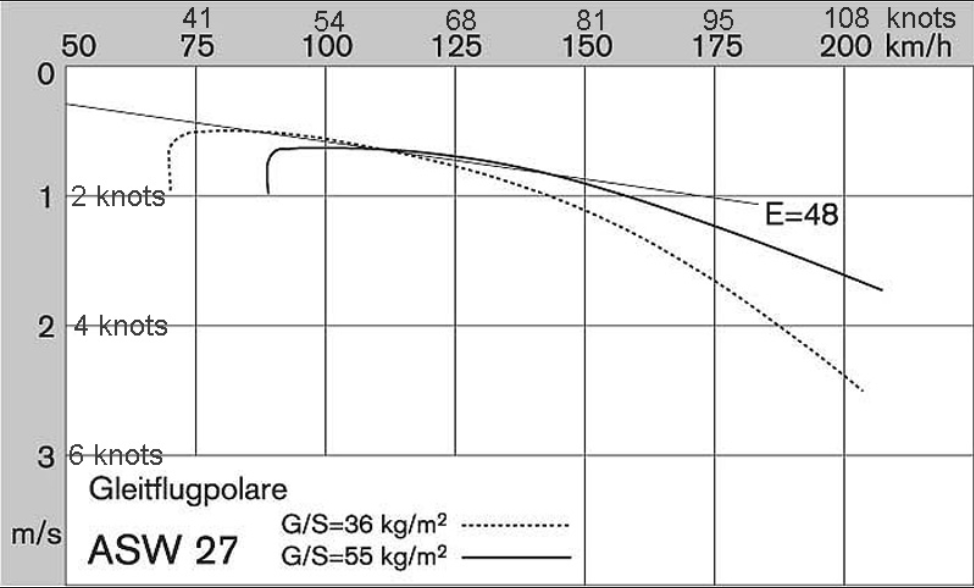

In [1]:
from IPython.display import Image, display
display(Image(filename='img/asw27polar.png', embed=True, width=600, height=600))

We will create a mathematical representation of this curve using the programming language Python and the glidepy library. We can then easily analyze various aspects of salplane performance.

## What is glidepy?

glidepy is a Python library that performs common and useful polar and speed-to-fly calculations useful for sailplane performance analysis and simulations.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [3]:
import glidepy as pg

In [4]:
warnings.simplefilter('ignore', np.RankWarning)
%matplotlib notebook

Lets define some useful unit conversion factors.

In [5]:
kmh_to_knots = 0.539957
ms_to_knots = 1.94384
knots_to_kmh = 1.852
nm_to_feet = 6076.12
nm_to_sm = 1.15078

## Creating the asw27

Create an unballasted asw27 Glider object and initialize it with the polar data points and the reference weight. The first vector are speeds in Km/h. The secind are the corresponding sink rates in m/s. The weight is in lbs. This is the part that uniquely specifies the glider we are analyzing and the configuration (ballasted or not).

For this, we need at least three points from the original polar and the associated reference weight. The rest is calculated by glidepy, including any data for other weights.

In [6]:
speeds = [90, 150.0, 200.0]
sink_rates = [-0.55, -1.11, -2.38]
ref_weight = 787
weight = 1102

In [7]:
asw27 = pg.Glider(speeds, sink_rates, ref_weight)

# A ballasted glider is created by specifying the ballasted weight also
asw27_wet = pg.Glider(speeds, sink_rates, ref_weight, weight)

#### glidepy creates a mathematical model of the sailplane polar.

Now we can ask: What is the sink rate (in knots) at 100 knots? We can query the model of the polar.

In [8]:
asw27.polar(100)  # speed and resulting sink rate in knots

-3.7151792055454873

We can set a non-zero airmass sink/lift, ie, netto. In this case to get the total sink rate use the sink_rate attribute. The polar attribute used above always stays the same as a reference.

## Plotting the polar

Lets plot the polar in the speed range 40 to 140 knots in 5 knot increments.

In [9]:
speed_range = np.arange(40, 145, 5)
polar_graph = [asw27.polar(x) for x in speed_range]

# And for the ballasted glider too
polar_graph_wet = [asw27_wet.polar(x) for x in speed_range]

We will plot the the dry and wet polars, together with the source data points from which the models were created.

<IPython.core.display.Javascript object>


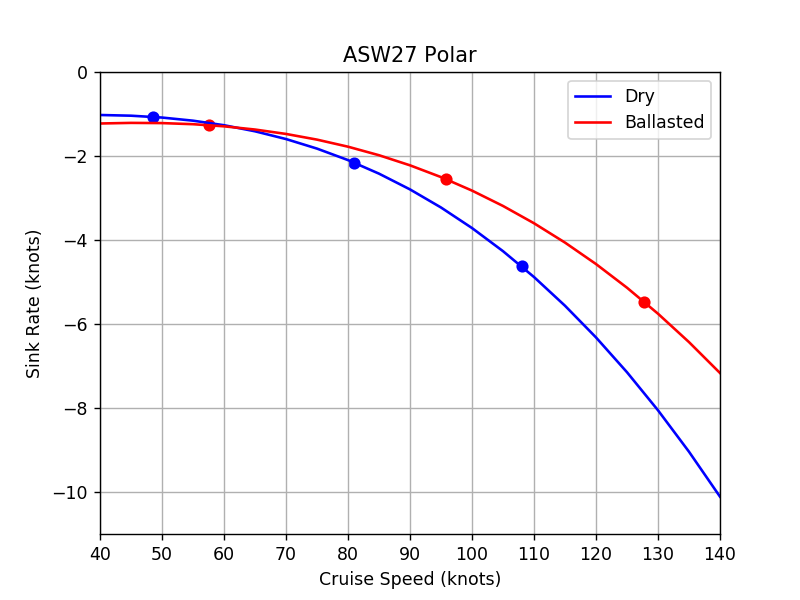

In [10]:
fig, ax = plt.subplots()

ax.plot(speed_range, polar_graph, color="blue")
ax.scatter(asw27.speeds, asw27.sink_rates, color="blue")

ax.plot(speed_range, polar_graph_wet, color="red")
ax.scatter(asw27_wet.speeds, asw27_wet.sink_rates, color="red")

ax.set(title='ASW27 Polar',
       ylabel='Sink Rate (knots)',
       xlabel='Cruise Speed (knots)',
       xticks=range(40,150,10), 
       ylim=(-11, 0),
       xlim=(40, 140))
ax.legend(['Dry', 'Ballasted'])
plt.grid()
plt.show()